# Vorhersage von Aktienkursveränderungen

Seit Jahren nutzen Unternehmen öffentlich zugängliche Informationen, um Kursreaktionen an Aktienmärkten vorherzusagen. Nachrichten und Medienberichte rücken dabei immer mehr in den Vordergrund. Innovative Unternehmen wie z.B. [YukkaLab](https://www.yukkalab.com/) versprechen dabei z.B. die relevanten News für die Finanzbranche systematisch zu erfassen und Schwankungen am Aktienmarkt zu prognostizieren.

Im Rahmen des Assignment werden entsprechende Vorhersagemodelle entwickelt, die mithilfe von News-Meldungen Kursveränderungen vorhersagen. Ziel ist es, abschätzen zu können, ob entsprechende Vorhersagemodelle realistisch erscheinen. Kursschwankungen von Aktien unterliegen ja einer Vielzahl von Einflüssen, die Veränderungen oftmals zufällig erscheinen lassen.

Sie wollen nun ein Prognosemodell zum Intra-Day-Trading entwickeln und haben sich einen Web-Crawler gebaut, der historische Börsenkurse und die 25 am häufigsten gelikten Reddit-Nachrichten pro Kalendertag, bzw. deren Titel / Headline sammelt. Die Reddit-Daten haben Sie bereits einer Sentiment-Analyse unterzogen (je grösser die Polarität, desto positiver war die Stimmung an diesem Tag).

Im Detail haben Sie folgende Features zur Verfügung, "daily_movement_binary" ist das Target.

|Feature|Beschreibung|
|---|---|
|daily_movement_binary|Entwicklung des Aktionkurses am Ende des Prognosetages|
|Open|Eröffnungspreis am Prognosetag|
|High|Tageshöchststand am Prognosetag|
|Close|Endstand am Prognosetag|
|Adj Close|Angepasster Endstand am Prognosetag|
|Low|Tagestiefststand am Prognosetag|
|Volumen|Handelsvolumen am Prognosetag|
|Polarity_1|Sentiment der Newsmeldungen auf Reddit am Vortag des Prognosetages|
|Polarity_2|Sentiment der Newsmeldungen auf Reddit 2 Tage vor dem Prognosetag|
|Polarity_3|Sentiment der Newsmeldungen auf Reddit 3 Tage vor dem Prognosetag|
|Polarity_4|Sentiment der Newsmeldungen auf Reddit 4 Tage vor dem Prognosetag|
|Polarity_5|Sentiment der Newsmeldungen auf Reddit 5 Tage vor dem Prognosetag|
|Polarity_6|Sentiment der Newsmeldungen auf Reddit 6 Tage vor dem Prognosetag|
|Polarity_7|Sentiment der Newsmeldungen auf Reddit 7 Tage vor dem Prognosetag|
|Open_1|Eröffnungspreis am Vortag des Prognosetages|
|Open_2|Eröffnungspreis 2 Tage vor dem Prognosetag|
|Open_3|Eröffnungspreis 3 Tage vor dem Prognosetag|
|Open_4|Eröffnungspreis 4 Tage vor dem Prognosetag|
|Open_5|Eröffnungspreis 5 Tage vor dem Prognosetag|
|Open_6|Eröffnungspreis 6 Tage vor dem Prognosetag|
|Open_7|Eröffnungspreis 7 Tage vor dem Prognosetag|

## 1) Lesen Sie das Datenset ein. Wandeln sie das Target in eine numerische Variable um. Wandeln Sie alle Features in Floats um.

In [1223]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

csv_file_path = 'Documents/Uni/BA&DSA/dowjones_reddit_nan.csv'

abs_path = os.path.abspath(csv_file_path)

abs_path


'/Users/alexandragort/Documents/Uni/BA&DSA/Documents/Uni/BA&DSA/dowjones_reddit_nan.csv'

In [1224]:
import pandas as pd

# Provide the corrected path to your CSV file
csv_file_path = '/Users/alexandragort/Documents/Uni/BA&DSA/dowjones_reddit_nan.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify that it was loaded correctly
df.head()


,Open,High,Low,Close,Adj Close,Volume,daily_movement_binary,Open_1,Polarity_1,Open_2,...,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7,Day
0,17645.01953,17923.00977,17498.23047,NaN,NaN,99360000,down,17742.05078,-3.550856,17911.01953,...,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832,7
1,17609.06055,17609.06055,17264.90039,17427.08984,17427.08984,109180000,down,17645.01953,-3.089996,17742.05078,...,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,8
2,17436.30078,17517.41016,17298.03906,NaN,NaN,94520000,down,17609.06055,-6.729233,17645.01953,...,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,9
3,17320.00000,17528.36914,17243.55078,17511.57031,17511.57031,140480000,up,17436.30078,-0.334698,17609.06055,...,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,10
4,17516.96094,17588.69922,17346.73047,NaN,NaN,119600000,down,17320.00000,-1.855250,17436.30078,...,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,11


Making a dummy variable out of target feature to turn it into a float.

In [1225]:
df = pd.get_dummies(df, columns=['daily_movement_binary'], drop_first=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,...,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7,Day,daily_movement_binary_up
0,17645.01953,17923.00977,17498.23047,NaN,NaN,99360000,17742.05078,-3.550856,17911.01953,-4.337578,...,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832,7,0
1,17609.06055,17609.06055,17264.90039,17427.08984,17427.08984,109180000,17645.01953,-3.089996,17742.05078,-3.550856,...,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,8,0
2,17436.30078,17517.41016,17298.03906,NaN,NaN,94520000,17609.06055,-6.729233,17645.01953,-3.089996,...,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,9,0
3,17320.00000,17528.36914,17243.55078,17511.57031,17511.57031,140480000,17436.30078,-0.334698,17609.06055,-6.729233,...,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,10,1
4,17516.96094,17588.69922,17346.73047,NaN,NaN,119600000,17320.00000,-1.855250,17436.30078,-0.334698,...,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,11,0


truning everything into a float

In [1226]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Open                      369 non-null    float64
 1   High                      369 non-null    float64
 2   Low                       369 non-null    float64
 3   Close                     169 non-null    float64
 4   Adj Close                 169 non-null    float64
 5   Volume                    369 non-null    float64
 6   Open_1                    369 non-null    float64
 7   Polarity_1                369 non-null    float64
 8   Open_2                    369 non-null    float64
 9   Polarity_2                369 non-null    float64
 10  Open_3                    369 non-null    float64
 11  Polarity_3                369 non-null    float64
 12  Open_4                    369 non-null    float64
 13  Polarity_4                369 non-null    float64
 14  Open_5    

In [1227]:
df = df.drop('Close', axis=1) #close dropen um multikoliearität zu verhindern
df = df.set_index('Day')


## 2) Erstellen Sie Test- und Trainingsdaten. Die Trainingsdaten sollten 78% der verfügbaren Instanzen umfassen. Die Daten sind zeitlich geordnet. Die letzten 22% sollen die Testdaten darstellen.

In [1228]:
X = df.drop("daily_movement_binary_up", axis=1)
y = df['daily_movement_binary_up']

In [1229]:
from sklearn.model_selection import train_test_split

# Split the data without shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state = 1, shuffle=False)



In [1230]:
X.shape

(369, 19)

In [1231]:
X_train.shape

(287, 19)

In [1232]:
X_test.shape

(82, 19)

## 3) Ihnen ist aufgefallen, dass ihr WebCrawler fehlerhaft ist und "missing values" produziert. Untersuchen Sie welche Features betroffen sind. Welche würden Sie mit einem geeigneten Verfahren imputieren und welche würden Sie löschen?

In [1233]:
check = df.columns[pd.isnull(df).any()]
nan_cols = check.tolist()
print(nan_cols)

total_missing_values = df.isnull().sum()
print("Total number of missing values in the dataset:", total_missing_values)
#Quelle: https://monashdatafluency.github.io/python-workshop-base/modules/missing_values/#:~:text=Finding%20Missing%20Values,-Let's%20identify%20all&text=We%20can%20use%20the%20isnull,True%20in%20the%20output%20object.
#https://www.javatpoint.com/numpy-array-tolist#:~:text=tolist()%2C%20used%20to%20convert,elements%20as%20a%20Python%20list.

['Adj Close']
Total number of missing values in the dataset: Open                          0
High                          0
Low                           0
Adj Close                   200
Volume                        0
Open_1                        0
Polarity_1                    0
Open_2                        0
Polarity_2                    0
Open_3                        0
Polarity_3                    0
Open_4                        0
Polarity_4                    0
Open_5                        0
Polarity_5                    0
Open_6                        0
Polarity_6                    0
Open_7                        0
Polarity_7                    0
daily_movement_binary_up      0
dtype: int64


Es ist erkennbar dass die beiden Variablen Close und Adj Close missing values porduzieren. Und weil von insgesamt 369 ganze 200 fehlen kann man die Missing Values nicht einfach alle löschen, sonst würde ein viel zu grosser Anteil der Daten verloren gehen. Deshalb werde ich die KNN Methode verwenden um diese fehlenden Werte des Training datasets zu predicten (Nur training data um Overfitting zu verhindern und es wird somit auch realistischer als wenn wir KNN auf dem gesamten Dataset anwenden - Quelle Selfstudyvdieo), da meiner Meinung nach Mean imputation aufgrund der grossen Menge der fehlenden Daten nicht unbedingt sinnvoll ist, sonst hat dieser Durchschnitt ein "zu grosses" Gewicht.

In [1234]:
imputer = KNNImputer()
imputer.fit(X_train)
X_train_imputed= imputer.transform(X_train)

Select the data and create test and training data and then impute the data on training data:

In [1235]:
names = imputer.feature_names_in_
X_train_imputed = pd.DataFrame(X_train_imputed, columns=names, index = X_train.index)
X_train_imputed

,Open,High,Low,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7
Day,,,,,,,,,,,,,,,,,,,
7.0,17645.01953,17923.00977,17498.23047,17550.431642,99360000.0,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832
8.0,17609.06055,17609.06055,17264.90039,17427.089840,109180000.0,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574
9.0,17436.30078,17517.41016,17298.03906,17693.681640,94520000.0,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866
10.0,17320.00000,17528.36914,17243.55078,17511.570310,140480000.0,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553
11.0,17516.96094,17588.69922,17346.73047,17075.687696,119600000.0,17320.00000,-1.855250,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289.0,16712.69922,16795.98047,16623.91016,17550.431642,98480000.0,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,16483.75977,-3.594815,16217.98047,-3.783587
290.0,16634.15039,16726.11914,16510.40039,17334.567772,126220000.0,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,16483.75977,-3.594815
291.0,16545.66992,16865.56055,16545.66992,17580.814062,105050000.0,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933


## 4) Traineren Sie eine logistische Regression. Bestimmen Sie Precision, Recall und AUC, um die Generalisierbarkeit Ihrer Vorhersagen evaluieren zu können. Was bedeuten diese Kennzahlen im vorliegenden Kontext?

In [1236]:
default = sm.Logit(y_train, sm.add_constant(X_train_imputed))

# Das Modell anpassen
default = default.fit()

# Zusammenfassung des Modells anzeigen
print(default.summary())

Optimization terminated successfully.
         Current function value: 0.282814
         Iterations 8
                              Logit Regression Results                              
Dep. Variable:     daily_movement_binary_up   No. Observations:                  287
Model:                                Logit   Df Residuals:                      267
Method:                                 MLE   Df Model:                           19
Date:                      Sun, 12 Nov 2023   Pseudo R-squ.:                  0.5919
Time:                              22:04:51   Log-Likelihood:                -81.168
converged:                             True   LL-Null:                       -198.89
Covariance Type:                  nonrobust   LLR p-value:                 2.703e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5125     10.987      0.138      0.891     -

In [1237]:
#standardizing the coefficients:
standardized_effects = X_train_imputed.std() * default.params
standardized_effects

Adj Close      0.516259
High          13.898469
Low           16.619502
Open         -31.736561
Open_1         2.056170
Open_2        -1.702104
Open_3         0.695897
Open_4        -0.207491
Open_5         0.686416
Open_6        -1.854414
Open_7         1.032175
Polarity_1     0.189042
Polarity_2     0.126872
Polarity_3    -0.162473
Polarity_4    -0.093899
Polarity_5    -0.002729
Polarity_6     0.250155
Polarity_7    -0.077426
Volume         0.102065
const               NaN
dtype: float64

In [1238]:
np.exp(standardized_effects)

Adj Close     1.675746e+00
High          1.086497e+06
Low           1.651042e+07
Open          1.648112e-14
Open_1        7.815977e+00
Open_2        1.822995e-01
Open_3        2.005508e+00
Open_4        8.126206e-01
Open_5        1.986583e+00
Open_6        1.565447e-01
Open_7        2.807166e+00
Polarity_1    1.208091e+00
Polarity_2    1.135271e+00
Polarity_3    8.500394e-01
Polarity_4    9.103744e-01
Polarity_5    9.972748e-01
Polarity_6    1.284224e+00
Polarity_7    9.254951e-01
Volume        1.107455e+00
const                  NaN
dtype: float64

In [1239]:
X_test_imputed = imputer.transform(X_test)
X_test_imputed=pd.DataFrame(X_test_imputed, columns = names, index=X_test.index)
X_test_imputed

,Open,High,Low,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7
Day,,,,,,,,,,,,,,,,,,,
294.0,16945.00000,17062.38086,16898.83984,17631.577736,106910000.0,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381
295.0,16991.28906,17099.25000,16940.48047,17627.537892,100290000.0,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552
296.0,17050.66992,17072.78906,16921.50977,16964.099610,108380000.0,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554
297.0,16969.16992,17048.50000,16947.93945,17649.587890,116690000.0,17050.66992,-1.277540,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264
298.0,17006.05078,17130.10938,16821.85938,16995.130860,117570000.0,16969.16992,-2.922243,17050.66992,-1.277540,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371.0,17844.10938,18011.07031,17844.10938,18011.070310,98070000.0,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250,17710.76953,-3.418198
372.0,17946.63086,17946.63086,17356.33984,17400.750000,239000000.0,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250
373.0,17355.21094,17355.21094,17063.08008,17140.240230,138740000.0,17946.63086,0.366238,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657


Making predictions now:

In [1240]:
y_test_pred_logistic = default.predict(sm.add_constant(X_test_imputed)) 
roc_auc_score(y_test, y_test_pred)

0.9363017934446505

In [1241]:
y_test_pred_logistic

Day
294.0    0.938298
295.0    0.777738
296.0    0.048178
297.0    0.959378
298.0    0.253130
           ...   
371.0    0.986894
372.0    0.000003
373.0    0.004209
374.0    0.986702
375.0    0.994220
Length: 82, dtype: float64

In [1242]:
y_test_predclass = (y_test_pred_logistic > 0.5).astype(int)
y_test_predclass.head(10)

Day
294.0    1
295.0    1
296.0    0
297.0    1
298.0    0
299.0    1
300.0    1
301.0    0
302.0    1
303.0    1
dtype: int64

In [1243]:
confusion_matrix(y_test, y_test_predclass)

array([[28,  5],
       [ 7, 42]])

Precision:

Precision= True Positives / (False Positives+True Positives) = 42/(42+5)=0.89

Die Precision sagt uns also aus, dass 89% true positives sind, und die restlichen 11% sind false positives. Das ist eine sehr hohe precision.

Recall:

Recall=True Positives / (False Negatives +True Positives)=42/(42+7)=0.85

Der Recall sagt uns, dass 85% der positiven Fälle als positiv erkannt wurden. Ebenfalls eher viele...

Accuracy=number of correct pred/total number of pred= (42+28)/(42+28+5)=0.85 
Das bedeutet ebenfalls dass unser modell sehr effektiv ist und korrekte Vorhersagen für den grössten Teil des df macht.

Die ROC AUC score sagt aus, das unser Model sehr gut performt (je näher an 1 umso besser) und 0.93 ist fast schon zuu gut...

In [1244]:
print(classification_report(y_test, y_test_predclass))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82        33
         1.0       0.89      0.86      0.88        49

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82



In [1245]:
fpr, tpr, tresholds = roc_curve(y_test, y_test_pred)

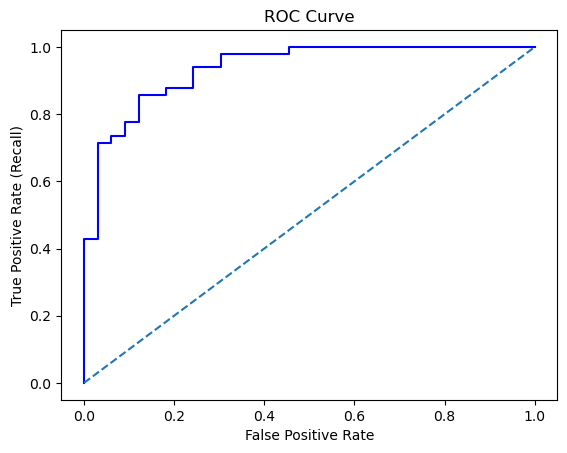

In [1246]:
fix, ax = plt.subplots()
ax.plot(fpr, tpr, color = "blue")
ax.plot([0,1], [0,1], "--")

ax.set_title("ROC Curve")
ax.set_ylabel("True Positive Rate (Recall)")
ax.set_xlabel("False Positive Rate")

plt.show()

In [1247]:
J = tpr-fpr
tresholds[np.argmax(J)]

0.5419140577467154

## 5)  Die Erbnisse erscheinen Ihnen zu gut... Sie kommen zu dem Schluss, dass einige der Features im Modell einen Recht hohen Bezug zum Target haben könnten und deren finalen Werte erst vorliegen, wenn man bereits weiss, ob sich der Aktienkurs hoch oder runter entwickelt hat. Welche illegitimen Features werden in dem Model verwendet? Löschen Sie diese

Diese zwei features High und Low haben für mich die geringste Legitimität, da die Infos von Low und high über Höchst- und Tiefststand am Prognosetag wiedergeben, und somit erst nach der Prognose bekannt sind, also quasi würden wir mit zukünftigen Daten trainieren, die eigentlich noch gar nicht da sind.

Diese features werde ich deshalb und da sie die höchsten korrelationen mit dem target haben nun herauslöschen um die Regression zu wiederholen.

In [1248]:
X_train_clean = X_train.drop(['High', 'Low'], axis=1)
X_train_clean

,Open,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7
Day,,,,,,,,,,,,,,,,,
7.0,17645.01953,NaN,99360000.0,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832
8.0,17609.06055,17427.08984,109180000.0,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574
9.0,17436.30078,NaN,94520000.0,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866
10.0,17320.00000,17511.57031,140480000.0,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553
11.0,17516.96094,NaN,119600000.0,17320.00000,-1.855250,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289.0,16712.69922,NaN,98480000.0,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,16483.75977,-3.594815,16217.98047,-3.783587
290.0,16634.15039,NaN,126220000.0,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,16483.75977,-3.594815
291.0,16545.66992,NaN,105050000.0,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933


In [1249]:
X_test_clean = X_test.drop(['High', 'Low'], axis=1)
X_test_clean

,Open,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7
Day,,,,,,,,,,,,,,,,,
294.0,16945.00000,NaN,106910000.0,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381
295.0,16991.28906,NaN,100290000.0,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552
296.0,17050.66992,16964.09961,108380000.0,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554
297.0,16969.16992,NaN,116690000.0,17050.66992,-1.277540,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264
298.0,17006.05078,16995.13086,117570000.0,16969.16992,-2.922243,17050.66992,-1.277540,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371.0,17844.10938,18011.07031,98070000.0,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250,17710.76953,-3.418198
372.0,17946.63086,17400.75000,239000000.0,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250
373.0,17355.21094,17140.24023,138740000.0,17946.63086,0.366238,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657


In [1250]:
imputer = KNNImputer()
imputer.fit(X_train_clean)
X_train_clean_imputed= imputer.transform(X_train_clean)
names = imputer.feature_names_in_
X_train_clean_imputed = pd.DataFrame(X_train_clean_imputed, columns=names, index = X_train_clean.index)
X_train_clean_imputed

,Open,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7
Day,,,,,,,,,,,,,,,,,
7.0,17645.01953,17550.431642,99360000.0,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574,17823.07031,-3.770832
8.0,17609.06055,17427.089840,109180000.0,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866,17821.30078,-4.721574
9.0,17436.30078,17693.681640,94520000.0,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553,17504.17969,-2.658866
10.0,17320.00000,17511.570310,140480000.0,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442,17374.77930,-4.790553
11.0,17516.96094,17075.687696,119600000.0,17320.00000,-1.855250,17436.30078,-0.334698,17609.06055,-6.729233,17645.01953,-3.089996,17742.05078,-3.550856,17911.01953,-4.337578,17591.97070,-5.969442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289.0,16712.69922,17550.431642,98480000.0,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,16483.75977,-3.594815,16217.98047,-3.783587
290.0,16634.15039,17334.567772,126220000.0,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933,16483.75977,-3.594815
291.0,16545.66992,17580.814062,105050000.0,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381,16610.39063,-3.598045,16417.13086,-2.725929,16410.96094,-4.403933


In [1251]:
imputer = KNNImputer()
imputer.fit(X_test_clean)
X_test_clean_imputed= imputer.transform(X_test_clean)
names = imputer.feature_names_in_
X_test_clean_imputed = pd.DataFrame(X_test_clean_imputed, columns=names, index = X_test_clean.index)
X_test_clean_imputed

,Open,Adj Close,Volume,Open_1,Polarity_1,Open_2,Polarity_2,Open_3,Polarity_3,Open_4,Polarity_4,Open_5,Polarity_5,Open_6,Polarity_6,Open_7,Polarity_7
Day,,,,,,,,,,,,,,,,,
294.0,16945.00000,17527.511718,106910000.0,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552,16418.83984,-4.125381
295.0,16991.28906,17805.251952,100290000.0,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554,16504.38086,-3.767552
296.0,17050.66992,16964.099610,108380000.0,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264,16712.69922,-5.277554
297.0,16969.16992,17239.130078,116690000.0,17050.66992,-1.277540,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251,16634.15039,-5.605264
298.0,17006.05078,16995.130860,117570000.0,16969.16992,-2.922243,17050.66992,-1.277540,16991.28906,-5.256893,16945.00000,-3.780096,16896.16992,-2.082482,16851.16992,-1.314639,16545.66992,-2.794251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371.0,17844.10938,18011.070310,98070000.0,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250,17710.76953,-3.418198
372.0,17946.63086,17400.750000,239000000.0,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657,17703.65039,-2.619250
373.0,17355.21094,17140.240230,138740000.0,17946.63086,0.366238,17844.10938,-1.696542,17832.66992,-1.959857,17827.33008,-4.119015,17736.86914,-5.570253,17733.43945,-4.037517,17602.23047,-3.371657


## 6)  Wiederholen Sie die logistische Regression und vergleichen Sie die Ergebnisse? Beurteilen Sie die Qualität des Modells und dessen potenzielle Nützlichkeit für den Erfolg des Modells. Was ist der Grund für den Rückgang an Vorhersagegenauigkeit?

In [1252]:
model1 = sm.Logit(y_train, sm.add_constant(X_train_clean_imputed))

In [1253]:
model1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.628609
         Iterations 5


In [1254]:
print(model1.summary())

                              Logit Regression Results                              
Dep. Variable:     daily_movement_binary_up   No. Observations:                  287
Model:                                Logit   Df Residuals:                      269
Method:                                 MLE   Df Model:                           17
Date:                      Sun, 12 Nov 2023   Pseudo R-squ.:                 0.09291
Time:                              22:05:19   Log-Likelihood:                -180.41
converged:                             True   LL-Null:                       -198.89
Covariance Type:                  nonrobust   LLR p-value:                  0.003410
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0580      5.389     -0.011      0.991     -10.620      10.503
Open          -0.0027      0.001     -3.146      0.002      -0.004      -0.001
Adj 

In [1255]:
y_test_pred_logisticreg1 = model1.predict(sm.add_constant(X_test_clean_imputed)) 


In [1256]:
y_test_pred_logisticregclass1 = (y_test_pred_logisticreg1 > 0.5).astype(int)
y_test_pred_logisticregclass1 

Day
294.0    1
295.0    1
296.0    0
297.0    0
298.0    0
        ..
371.0    0
372.0    0
373.0    1
374.0    1
375.0    1
Length: 82, dtype: int64

In [1257]:
confusion_matrix(y_test, y_test_pred_logisticregclass1)

array([[22, 11],
       [25, 24]])

In [1258]:
print(classification_report(y_test, y_test_pred_logisticregclass))

              precision    recall  f1-score   support

         0.0       0.47      0.67      0.55        33
         1.0       0.69      0.49      0.57        49

    accuracy                           0.56        82
   macro avg       0.58      0.58      0.56        82
weighted avg       0.60      0.56      0.56        82



In [1259]:
fpr, tpr, tresholds = roc_curve(y_test, y_test_pred_logisticregclass)

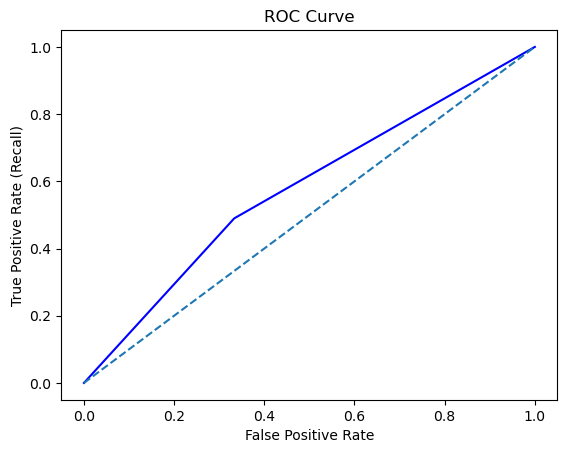

In [1260]:
fix, ax = plt.subplots()
ax.plot(fpr, tpr, color = "blue")
ax.plot([0,1], [0,1], "--")

ax.set_title("ROC Curve")
ax.set_ylabel("True Positive Rate (Recall)")
ax.set_xlabel("False Positive Rate")

plt.show()

Die Werte sind für das Cleane Logistic Regression model tiefer geworden, und somit die Vorhersagegenauigkeit zurückgeganen, wie erwartet. Die aktuellen Ergebnisse zeigen dass das cleanModell nach dem entfernen der Features high, low und close eine tiefere genauigkeit hat und es ist auch schwieriger korrekte Vorhersagen zu treffen. Es könnte sein, dass ich es zu stark vereinfacht habe. (Underfiting)

## 7)  Trainieren Sie einen Random Forest Classifier mit 750 Bäumen und vergleichen Sie die Vorhersagegenauigkeit mit der Logistischen Regression.

In [1261]:
from sklearn.ensemble import RandomForestClassifier

In [1262]:
forest = RandomForestClassifier(n_estimators = 750, random_state=1)

In [1263]:
forest.fit(X_train_clean_imputed, y_train)

RandomForestClassifier(n_estimators=750, random_state=1)

In [1264]:
def plot_variable_importance(model, X_train_clean_imputed):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp = DataFrame({"imp": model.feature_importances_, "names": X_train_clean_imputed.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6, imp.shape[0]/5), dpi=300)
    ax.barh(imp["names"], imp["imp"], color="green")
    ax.set_xlabel("Variable Importance")
    ax.set_ylabel("Features/n")
    ax.set_title("Variable Importance Plot")
    plt.show()

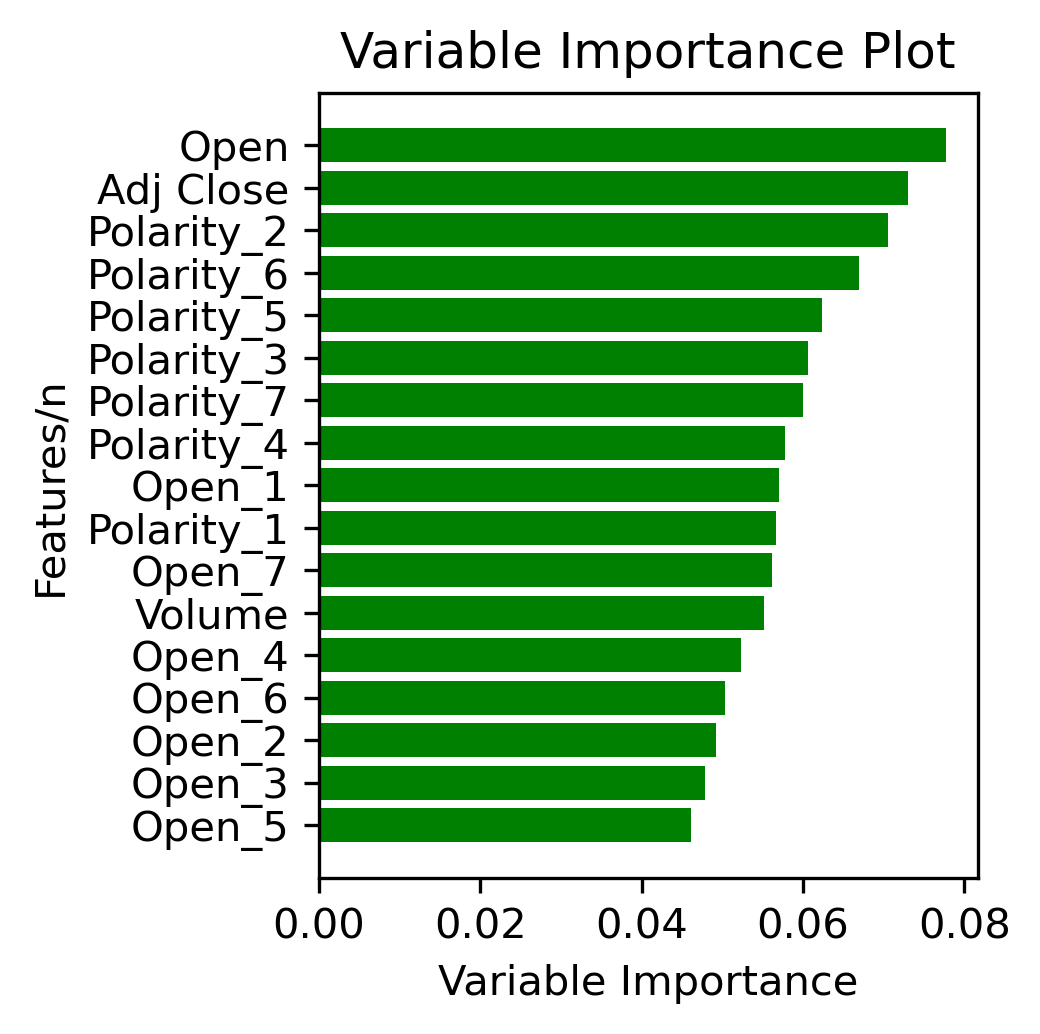

In [1265]:
plot_variable_importance(forest, X_train_clean_imputed)

In [1266]:
y_pred_forest = forest.predict(X_test_clean_imputed)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.50      0.61      0.55        33
         1.0       0.69      0.59      0.64        49

    accuracy                           0.60        82
   macro avg       0.60      0.60      0.59        82
weighted avg       0.61      0.60      0.60        82



Das RF model zeigt eine mittelmässige Leistung mit 60% Accuracy, einer Präzision von 50% für  0 und 69% für 1. Es erkennt etwa 61% der Kategorie 0 und 59% der 1 Beispiele. 
Die Wahl des Models hängt normalerweise oft von der Datenkomplexität ab, und die "schlechtere" Leistung könnte hier daran liegen, dass RF besser sind mit komplexeren Mustern während lineare Modelle für einfache zusammenhänge geeigneter sein können.


## 8) Erstellen Sie einen Variable Importance Plot. Was sind die wichtigsten Variablen? Vergleichen Sie diese Ergebnisse, mit den Ergebnissen der Logistischen Ergebnisse! Stimmen die Ergebnisse überein? Wie gehen Sie mit etwaigen Inkonsistenzen um?

In [1267]:
def plot_variable_importance(model, X_train_clean_imputed):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train_clean_imputed.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 

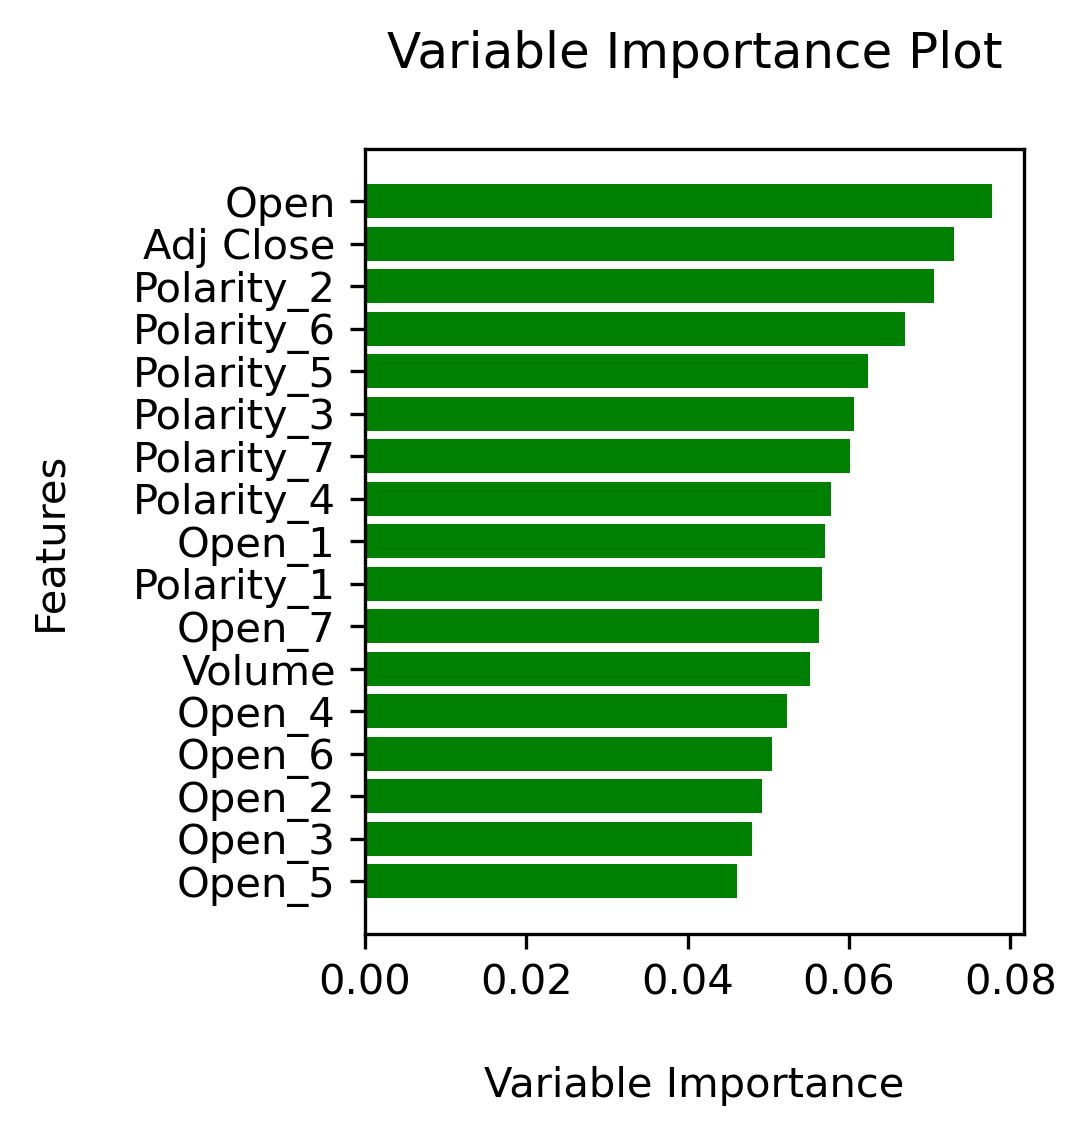

In [1268]:
plot_variable_importance(forest, X_train_clean_imputed)

Wir können hier erkennen, dass Open für den RF die höchste bedeutung hat genau wie vorher bei der Logistischen Regression auch. Aber als zweites feature haben wir eine Abweichung von der Regression. Die unterschiedlichen Wichtigkeiten der Merkmale sind von Modell zu Modell verschieden, da sich die beiden in ihren Strukturen und Ansätzen unterscheiden liegt es auch nahe das die Importances anders sind.

## 9) Erstellen Sie ein einfaches Ensemble, in dem sie die vorhergesagten Wahrscheinlichekeiten der beiden Algorithmen mitteln. Wählen sie einen geeigneten Threshold und vergleichen Sie die Vorhersagegenauigkeit mit den beiden einzelnen Modellen. 

In [1269]:
#lift kurve für logistische regression imputed and clean
lift1 = model1.predict(sm.add_constant(X_test_clean_imputed))
lift_log_regression_imputed = calculate_lift(y_test, lift1)
#lift kurve für logistische regression clean
lift2 = model1.predict(sm.add_constant(X_test_clean))
lift_log_regression= calculate_lift(y_test, lift2)

y_preds_proba = forest.predict_proba(X_test_clean_imputed)
lift_rand_forest = calculate_lift(y_test, y_preds_proba[:,1])

In [1270]:
def calculate_lift(y_val, y_pred):
    from pandas import DataFrame
    from numpy import ceil, arange
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = DataFrame()
    aux_lift['true'] = y_val
    aux_lift['predicted'] = y_pred
    aux_lift.sort_values('predicted', ascending=False, inplace=True)
    
    #Create the values that will go into the X axis of our plot
    xval = arange(0.01,1.01,0.01) #create sequnence of values from 0.01 to 1.00 in steps of 0.01
    lift = [] #create empty list for storing lift values
    
    #Calculate the total ratio of true events in the data
    ratio_true_events_total = aux_lift['true'].sum() / len(aux_lift)
    
    #Calculate lift for each x value its correspondent y value
    for x in xval:
        index_xval = int(ceil(x*len(aux_lift))) #get index at specific value of x
        dataframe_xval = aux_lift.iloc[:index_xval,:]   #subset dataframe from 0 to index_val
        lift_xval = dataframe_xval['true'].sum()/len(dataframe_xval) #calculate lift for subset
        lift.append(lift_xval / ratio_true_events_total) #store results
    
    return (DataFrame({"Lift":lift, "ProportionSample":xval}))

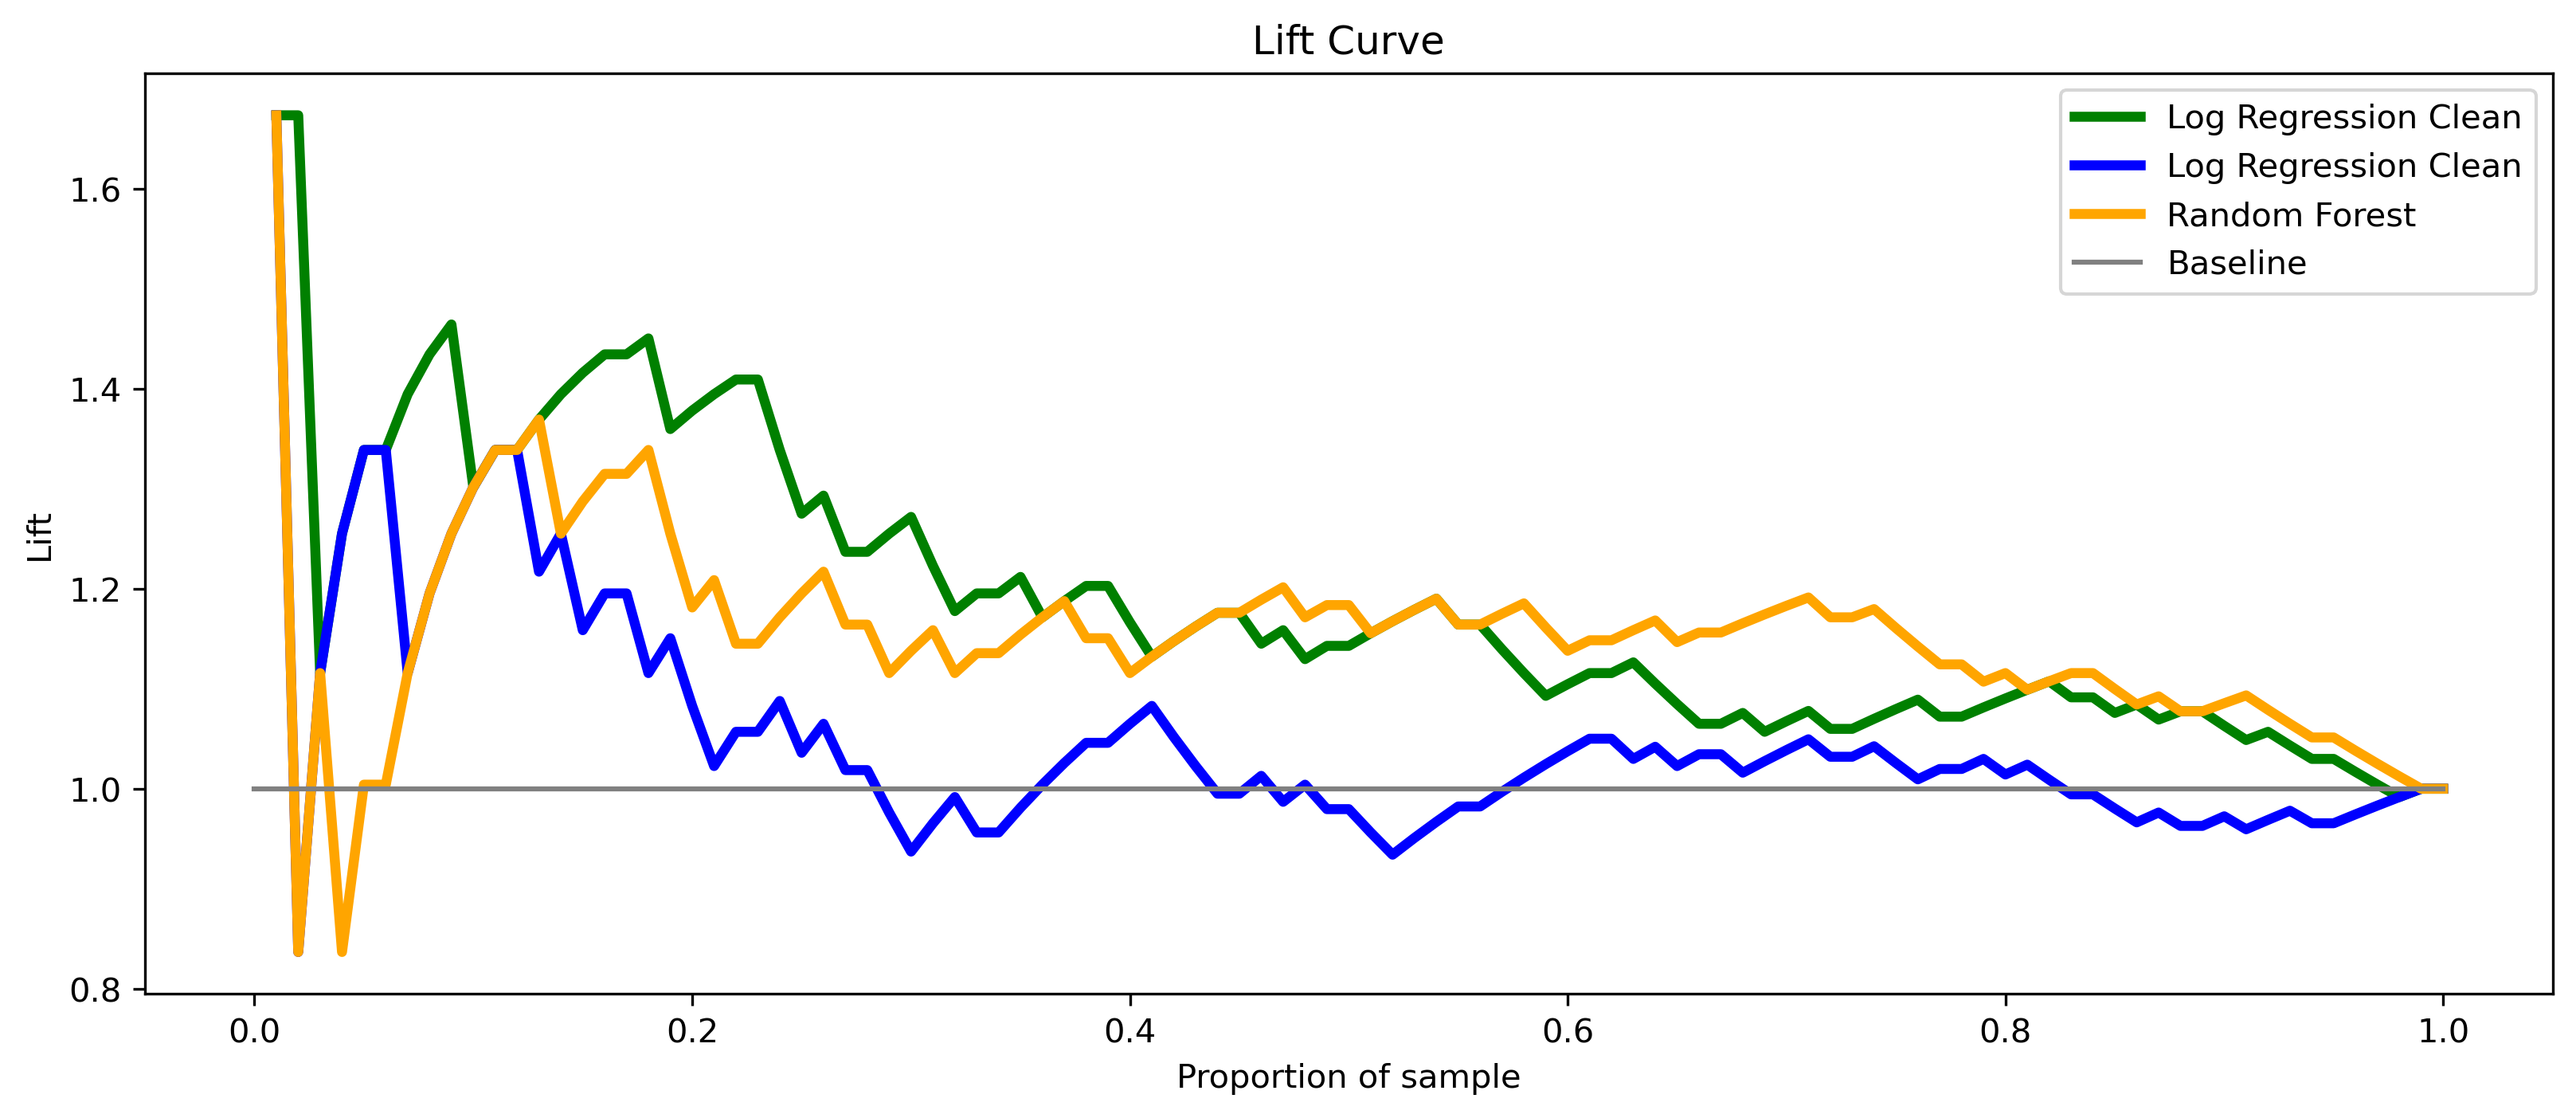

In [1271]:

fig, ax = plt.subplots(figsize = (13,5), dpi=300)
ax.plot(lift_log_regression_imputed["ProportionSample"],lift_log_regression_imputed["Lift"], color='green', linewidth = 3, label = "Log Regression Clean")
ax.plot(lift_log_regression["ProportionSample"],lift_log_regression["Lift"], color='blue', linewidth = 3, label = "Log Regression Clean")
ax.plot(lift_rand_forest["ProportionSample"], lift_rand_forest["Lift"], color="orange", linewidth = 3, label = "Random Forest" )
ax.plot([0,1],[1,1],color="grey", label="Baseline")
ax.set_xlabel('Proportion of sample')
ax.set_ylabel('Lift')
ax.set_title('Lift Curve')
ax.legend()
plt.show()

**Interpretation:**
Wir können erkennendass die Logistische Regression mit den imputierten Werten und den gedroppten features High und Low insgesamt betrachtet am besten performt. Die Regression mit den missing values fällt sogar unter die Baseline oder kommt dieser sehr nahe ist für die proportions of samle ab 0.2. Die Baseline ziegt und, dass an dieser geraden das modell so gut performt, wie wenn man einfach raten würde. Das RF modell ist für kleine proportions auch stark unter der base line hat eine höhere Wahrscheinlichkeit positive Instanzen korrekt zu klassifizieren, wenn die proportions hoöher sind.

## 10)	Die Daten stammen aus dem Jahr 2015/16. Beurteilen Sie ob die Daten auch heute noch sinnvoll verwendbar sind.

Da Aktienkurse sehr stark von aktuellen Ereignissen beeinflusst werden, sind Daten aus dem Jahr 2015/16 nicht mehr so sinnvoll verwendendbar. Da es sich um Daten von der Plattform Reddit handelt ist es insbesondere nicht angemessen, diese Daten noch heute zu verwenden, da Social Media sehr Trend-abhängig sind, die es möglicherweise zu dieser Zeit noch nicht gab, oder die nicht mehr relevant sind. 